<a href="https://colab.research.google.com/github/freehtet/NLP/blob/main/KERAS_1_TF_Sarcastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [1]:
import json

In [79]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2024-11-02 18:55:32--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.207, 74.125.203.207, 74.125.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  5.37MB/s    in 1.0s    

2024-11-02 18:55:33 (5.37 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [82]:
with open('/tmp/sarcasm.json', 'r') as f:
    data = json.load(f)

check_data

In [84]:
data[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

Spliting the json

In [14]:
text = []
label = []
link = []
for i in data:
    text.append(i['headline'])
    label.append(i['is_sarcastic'])
    link.append(i['article_link'])

Preprocession on the TEXT

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(text)

In [18]:
word_index = tokenizer.word_index

In [24]:
sequence = tokenizer.texts_to_sequences(text)

In [25]:
padded = pad_sequences(sequence, padding='post')

In [27]:
print(padded[1])
print(padded.shape)

[   4 8435 3338 2746   22    2  166 8436  416 3112    6  258    9 1002
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
(26709, 40)


In [29]:
training_size = int(len(text)*0.8)

In [30]:
print(training_size)

21367


In [31]:
training_text = text[:training_size]
training_label = label[:training_size]
testing_text = text[training_size:]
testing_label = label[training_size:]

In [38]:
# help(Tokenizer)

In [39]:
t_tokenizer = Tokenizer(oov_token='<OOV>')
t_tokenizer.fit_on_texts(training_text)

In [40]:
word_index = t_tokenizer.word_index

In [41]:
training_sequence = t_tokenizer.texts_to_sequences(training_text)
training_padded = pad_sequences(training_sequence, padding='post')

In [42]:
testing_sequence = t_tokenizer.texts_to_sequences(testing_text)
testing_padded = pad_sequences(testing_sequence, padding='post')

In [54]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_label)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_label)

In [45]:
import tensorflow as tf

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index)+1, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
                                                          ])

In [57]:
model.compile(optimizer='adam', # You can choose a different optimizer if needed
              loss='binary_crossentropy', # Adjust loss function based on your task
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [65]:
num_epochs = 30

In [78]:
# help(model.fit)

In [72]:
history = model.fit(training_padded, training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels),
                    verbose=2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
                    )

Epoch 1/30
668/668 - 3s - 5ms/step - accuracy: 0.9978 - loss: 0.0059 - val_accuracy: 0.8216 - val_loss: 1.3390
Epoch 2/30
668/668 - 4s - 6ms/step - accuracy: 0.9999 - loss: 6.6707e-04 - val_accuracy: 0.8186 - val_loss: 1.3406
Epoch 3/30
668/668 - 4s - 6ms/step - accuracy: 1.0000 - loss: 3.8185e-04 - val_accuracy: 0.8162 - val_loss: 1.3688
Epoch 4/30
668/668 - 5s - 7ms/step - accuracy: 1.0000 - loss: 1.8999e-04 - val_accuracy: 0.8192 - val_loss: 1.3942
Epoch 5/30
668/668 - 5s - 7ms/step - accuracy: 1.0000 - loss: 1.4914e-04 - val_accuracy: 0.8182 - val_loss: 1.4092
Epoch 6/30
668/668 - 4s - 6ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.8186 - val_loss: 1.4202


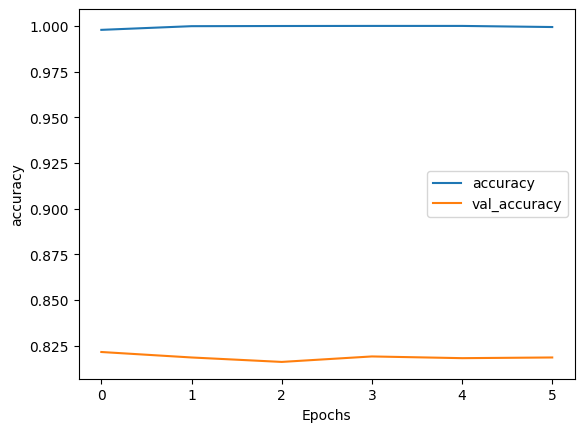

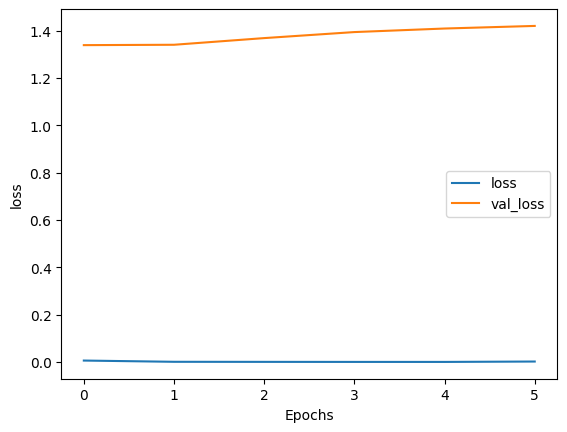

In [73]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [74]:
test_sentence = ["granny starting to fear spiders in the garden might be real", "the weather today is bright and sunny"]

In [75]:
test_sequence = t_tokenizer.texts_to_sequences(test_sentence)
test_padded = pad_sequences(test_sequence, padding='post')

In [77]:
print(model.predict(test_padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[9.756846e-03]
 [6.128279e-11]]
